# **Ridge Regression**
Ridge Regression is a regularized linear regression model. It's used to address some of the problems of ordinary least squares (OLS) regression, especially when dealing with multicollinearity (highly correlated independent variables) or when you have a large number of predictors.


# **Lasso Regression**
The Lasso Regression is same like the Ridge regression but with the Lasso regression we can do fecture Selection and Avoid overfiting

**Ridge and Lasso Regression is indeed a part of linear**
The core idea of linear regression is to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. Ridge Regression builds upon this by adding a penalty term to the standard linear regression cost function (Ordinary Least Squares). This penalty term is designed to shrink the regression coefficients, which helps to mitigate issues like multicollinearity and prevent overfitting, thus making the model more robust.

# California Housing Dataset
Ridge regression is best because:


1.   Multiple correlated features
2.   Continuous target (house price)


In [4]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [19]:
data =fetch_california_housing()
x = pd.DataFrame(data.data,columns=data.feature_names)
y = pd.Series(data.target,name="MedianHouseValue")

In [21]:
#Data Understanding
x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [22]:
y.describe

<bound method NDFrame.describe of 0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedianHouseValue, Length: 20640, dtype: float64>

# Check for Multicollinearity
Ridge regression is used when predictors are highly correlated

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Feature Scaling
Ridge penalizes magnitude of coefficients

Unscaled features → unfair penalty

Scaling ensures equal regularization

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)


In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled,y_train)

# Higher alpha → simpler model

# Lower alpha → closer to linear regression

Ridge()

# Model Evaluation
MSE → error magnitude

R² → variance explained

In [26]:
from sklearn.metrics import mean_squared_error,r2_score

y_pred =ridge.predict(X_test_scaled)
y_pred

array([0.71947224, 1.76384666, 2.709309  , ..., 4.46847645, 1.18797174,
       2.00922052])

In [27]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

0.5558548589435971
0.5758157428913684


# Compare with Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
lr_pred = lr.predict(X_test_scaled)

print("Mear Square Eror: ",mean_squared_error(y_test,lr_pred))
print("R2 score:",r2_score(y_test,lr_pred))

Mear Square Eror:  0.5558915986952442
R2 score: 0.575787706032451


In [30]:
print("Linear R2", r2_score(y_test,lr_pred))
print("Ridge R2", r2)

Linear R2 0.575787706032451
Ridge R2 0.5758157428913684


**Ridge**
A ridge regression model with a fixed regularization strength (alpha) that you manually choose.


---


**RidgeCV**
A ridge regression model with built-in cross-validation to automatically select the best alpha.

# Hyperparameter Tuning

In [34]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=[0.01,0.1,1,10,100])
ridge_cv.fit(X_train_scaled,y_train)
print("Best Alpha:",ridge_cv.alpha_)

Best Alpha: 1.0


In [49]:
from sklearn.linear_model import LassoCV
Lasso = LassoCV(alphas=[0.01,0.1e-2,1,10,100])
Lasso.fit(X_train_scaled,y_train)
lasso_predict= Lasso.predict(X_test_scaled)
print("Best Alpha:",Lasso.alpha_)

Best Alpha: 0.001


,Model,MSE,R2
0,Linear Regression,0.555892,0.575788
1,Ridge,0.555855,0.575816
2,Lasso,0.554491,0.576856


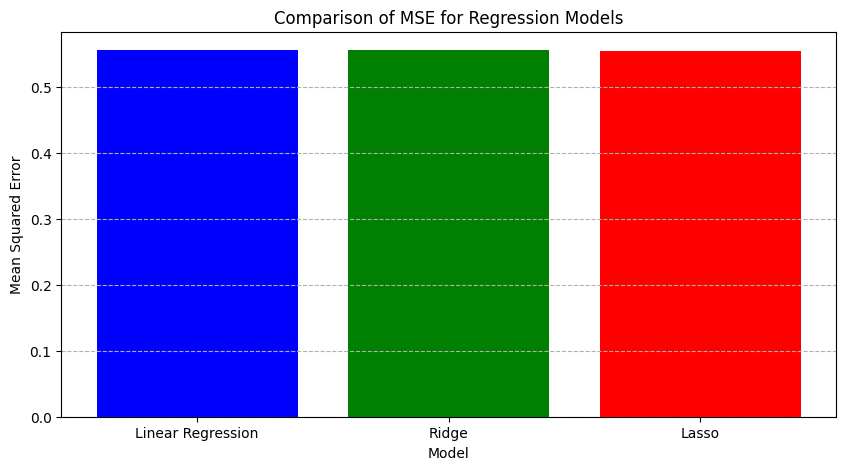

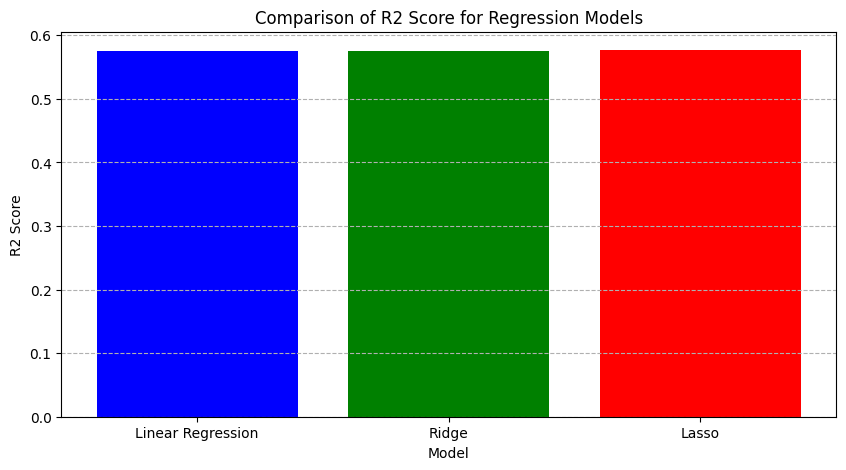


Model with the lowest MSE:
Model       Lasso
MSE      0.554491
R2       0.576856
Name: 2, dtype: object

Model with the highest R2 score:
Model       Lasso
MSE      0.554491
R2       0.576856
Name: 2, dtype: object


In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a dictionary to hold the results
results = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso'],
    'MSE': [mean_squared_error(y_test,lr_pred), mean_squared_error(y_test,y_pred), mean_squared_error(y_test,lasso_predict)],
    'R2': [r2_score(y_test,lr_pred), r2, r2_score(y_test,lasso_predict)]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)
display(results_df)

# Plotting MSE
plt.figure(figsize=(10, 5))
plt.bar(results_df['Model'], results_df['MSE'], color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE for Regression Models')
plt.grid(axis='y', linestyle='--')
plt.show()

# Plotting R2 Score
plt.figure(figsize=(10, 5))
plt.bar(results_df['Model'], results_df['R2'], color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Score for Regression Models')
plt.grid(axis='y', linestyle='--')
plt.show()

# Determine the best model based on MSE (lowest) and R2 (highest)
best_mse_model = results_df.loc[results_df['MSE'].idxmin()]
best_r2_model = results_df.loc[results_df['R2'].idxmax()]

print(f"\nModel with the lowest MSE:\n{best_mse_model}")
print(f"\nModel with the highest R2 score:\n{best_r2_model}")

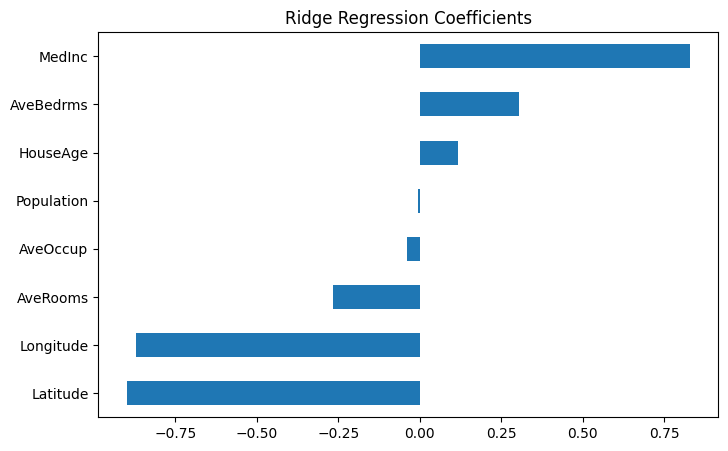

In [44]:
import matplotlib.pyplot as plt
coefficients = pd.Series(ridge.coef_, index=x.columns)
coefficients.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Ridge Regression Coefficients")
plt.show()

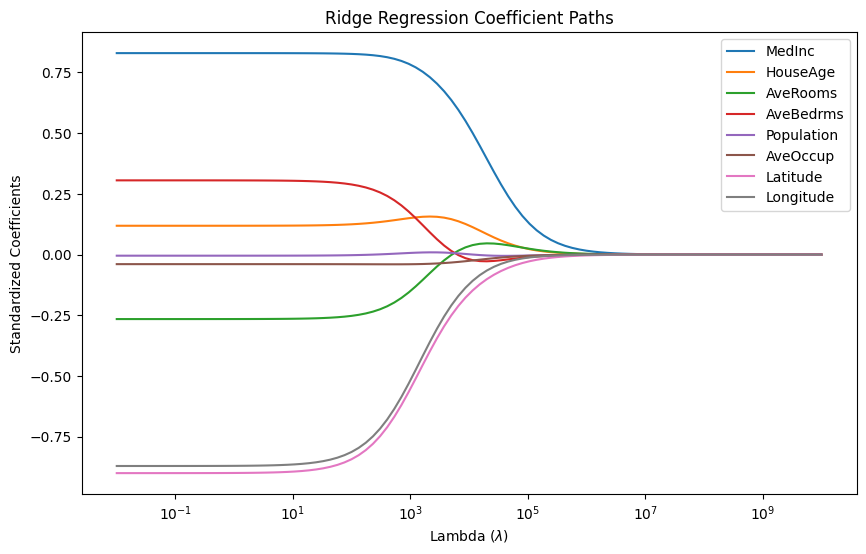

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


alphas = 10**np.linspace(10, -2, 100)

coefs = []

for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=True)
    ridge.fit(X_scaled, y)
    coefs.append(ridge.coef_)

coefs = np.array(coefs)

plt.figure(figsize=(10, 6))

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel(r'Lambda ($\lambda$)')
plt.ylabel('Standardized Coefficients')
plt.title('Ridge Regression Coefficient Paths')
plt.legend(x.columns, loc='best')
plt.axis('tight')
plt.show()
